In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
%matplotlib inline

In [2]:
total_df = pd.read_csv('https://github.com/CSC217/spring_2019/raw/master/final_exam/total_df.csv')
total_df.head()

,last_name,state,party,votes,votes_for,votes_against,vote_percentage,gdp
0,Abraham,LA,R,222,208,14,0.936937,53589
1,Adams,NC,D,236,31,204,0.135593,54441
2,Aderholt,AL,R,244,238,6,0.975410,45219
3,Aguilar,CA,D,242,52,190,0.214876,74205
4,Allen,GA,R,244,236,7,0.967213,55832


    1. How many members are in each party? (3 points)

In [3]:
total_df.groupby('party').count()

,last_name,state,votes,votes_for,votes_against,vote_percentage,gdp
party,,,,,,,
D,256,256,256,256,256,256,256
R,275,275,275,275,275,275,275


There are 256 Democratic representatives and 275 Republican representatives

    2. Which state has the most representatives? How many representatives does it have? (3 points)

In [4]:
total_df.groupby('state').count().max()

last_name          61
party              61
votes              61
votes_for          61
votes_against      61
vote_percentage    61
gdp                61
dtype: int64

In [5]:
total_df.groupby('state').count().sort_values('last_name', ascending=False)

,last_name,party,votes,votes_for,votes_against,vote_percentage,gdp
state,,,,,,,
CA,61,61,61,61,61,61,61
TX,45,45,45,45,45,45,45
FL,31,31,31,31,31,31,31
NY,31,31,31,31,31,31,31
PA,26,26,26,26,26,26,26
IL,21,21,21,21,21,21,21
OH,18,18,18,18,18,18,18
MI,18,18,18,18,18,18,18
VA,16,16,16,16,16,16,16


California has 61 representatives.

    3. Plot a histogram of the vote percentage for each state and describe what it looks like. (3 points)

(array([ 80., 115.,  43.,  11.,   4.,   2.,   5.,   6.,  40., 225.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

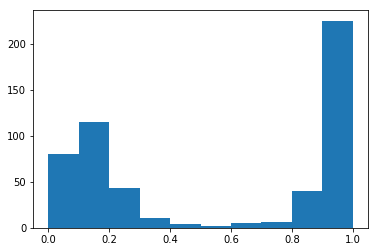

In [6]:
plt.hist(total_df['vote_percentage'])

The histogram is different from what we've typically seen in class as it is concetrated in the extreme ends of the distribution.

    4. What is the maximum vote percentage in the dataset? How many representatives have that maximum vote percentage? (4 points)

In [7]:
total_df['vote_percentage'].max()

1.0

In [8]:
total_df[total_df['vote_percentage'] == total_df['vote_percentage'].max()].shape

(8, 8)

The maximum vote percentage in the dataset is 100% - 8 representatives share it.

    5. Find out how many total Republican and Democrat votes were for against Trump's policies (hint: do a groupby and sum the 'votes_for' and 'votes_against' columns) (4 points)

In [9]:
total_df.groupby('party')[['votes_for', 'votes_against']].sum()

,votes_for,votes_against
party,,
D,8163,39779
R,50770,3608


    6. Now do a chi-squared test for homogeneity on the Democrats vs. Republicans to see if they could conceivably come from the same distribution (hint: use the methodology from this workbook:  https://github.com/CSC217/spring_2019/blob/master/week09-hypothesis_testing_ii/Hypothesis_Testing_II_Workbook.ipynb). What is the Chi-squared score from the test? Can we reject the null hypothesis that Democrats and Republicans come from the same distribution, voting-wise? (8 points)

In [10]:
observed_values = [[8163, 39779], [50770, 3608]]
stats.chi2_contingency(observed_values)

(60791.45718371537, 0.0, 1, array([[27613.03641517, 20328.96358483],
        [31319.96358483, 23058.03641517]]))

The chi-squared score from the test is 60,504.41. We can reject the null hypothesis that Democrats and Republicans come from the same distribution.

    7. Given the number of degrees of freedom in the test, what would be the minimum Chi-square value necessary to reject the null hypothesis at a 0.05 signifiance level that the Democrats and Republicans come from the same distribution, voting-wise? (8 points)

In [11]:
stats.chi2(1).ppf(0.95)

3.841458820694124

    8. What is the correlation between the GDP of the state a representative is representing and the percentage of time they agree with Trump? Is the correlation statistically significant? (5 points)

In [12]:
total_df

,last_name,state,party,votes,votes_for,votes_against,vote_percentage,gdp
0,Abraham,LA,R,222,208,14,0.936937,53589
1,Adams,NC,D,236,31,204,0.135593,54441
2,Aderholt,AL,R,244,238,6,0.975410,45219
3,Aguilar,CA,D,242,52,190,0.214876,74205
4,Allen,GA,R,244,236,7,0.967213,55832
5,Allred,TX,D,52,0,52,0.000000,61167
6,Amash,MI,R,240,148,92,0.616667,53209
7,Amodei,NV,R,240,236,4,0.983333,55269
8,Armstrong,ND,R,54,50,3,0.925926,72597
9,Arrington,TX,R,244,236,7,0.967213,61167


In [13]:
stats.pearsonr(total_df['gdp'], total_df['vote_percentage'])

(-0.35709529391775857, 2.0512046772530115e-17)

The correlation is -0.35 - it is statistically significant.

    9. Find the linear relationship between GDP and the GDP and likely percentage to vote. Plot the sdcatterplot with the predictive line on top of it. (6 points)

In [14]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

In [15]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(total_df['gdp'], total_df['vote_percentage'])

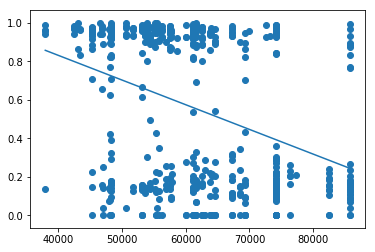

In [16]:
plt.scatter(total_df['gdp'], total_df['vote_percentage'])
sorted_order = np.argsort(total_df['gdp'])
plt.plot(total_df['gdp'][sorted_order], predictions[sorted_order])

    10. What is the R^2 value of this relationship? (5 points)

In [17]:
np.var(predictions)/np.var(total_df['vote_percentage'])

0.12751704893821011

    11. If a representative comes from a state with a GDP of $50,000, what is the predicted percentage of time that said representative will vote with Trump? (5 points)

In [18]:
intercept + (slope * 50000)

0.7029029463887216

    12. What is the average percentage of time that representatives agreed with Trump given that they came from states with a GDP *greater than* $45,000 and *less than* $55,000? (6 points)

In [19]:
total_df[(total_df['gdp'] > 45000) & (total_df['gdp'] < 55000)]['vote_percentage'].mean()

0.6620054458478446

    13. Plot the residuals plot. Is it homoskedastic or heteroskedastic? (5 points)

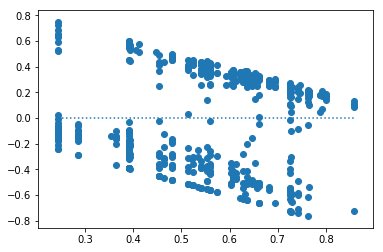

In [20]:
plt.scatter(predictions, residuals)
sorted_order = np.argsort(total_df['gdp'])
plt.plot([predictions.min(), predictions.max()], [0,0], linestyle='dotted')

    14. Overall do you think there's a linear relationship between these two variables? Why or why not? (4 points)

Given the heteroskedasticity of the residuals plot, there is not a linear relationship between the two variables.

    15. *BONUS* Given that the data looks at GDP at the state-level and voting percentage at the representative level, what would improve this data set? (5 points)

The GDP of the districts the representatives are in rather than the the state they are in could improve the data set.